# Sales Prediction using various regression techniques

Imports and data loading

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("data/sales_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Here, I check for null values. No null values in the dataset.

In [166]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Visualization of the data

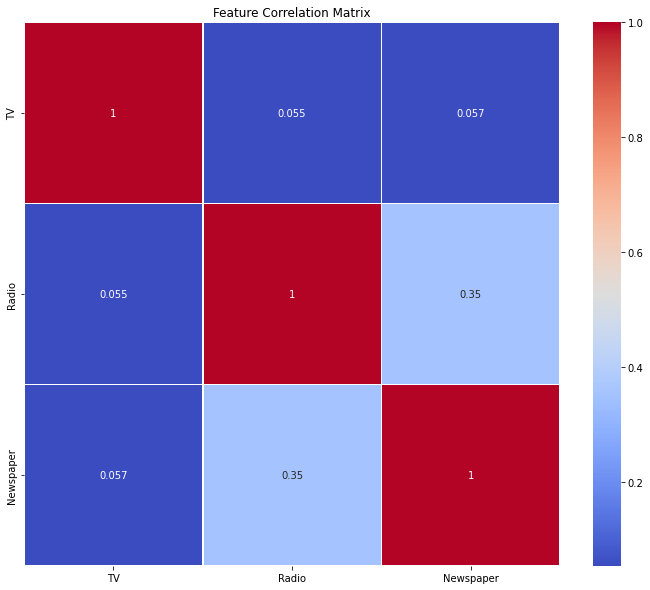

In [167]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[["TV", "Radio", "Newspaper"]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

We don't observe any high correlation between features, so we won't drop any of them.

Separate the features and the label, and split the data

In [168]:
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(["Sales"], axis=1))
y = np.array(data["Sales"])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model and use if for predictions

In [169]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

model_metrics = {}
for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    model_metrics[model_name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

results_df = pd.DataFrame(model_metrics).T
print("\nModel Performance:\n", results_df)



Model Performance:
                                MAE       MSE  R2 Score
Linear Regression         1.274826  2.907757  0.905901
Ridge Regression          1.273353  2.915303  0.905657
Lasso Regression          1.270952  2.926106  0.905307
Decision Tree             1.240000  3.402000  0.889907
Random Forest             0.916225  1.436151  0.953524
XGBoost                   0.820415  1.415974  0.954177
Support Vector Regressor  1.528940  4.303447  0.860735
K-Nearest Neighbors       1.395000  2.978780  0.903603


Pick the best model

In [170]:
best_model_name = results_df["R2 Score"].idxmax()
best_model = models[best_model_name]
best_model.fit(xtrain, ytrain)
ypred_best = best_model.predict(xtest)

Visualize the results

In [171]:
results = pd.DataFrame({
    "Actual Sales": ytest.flatten(),
    "Predicted Sales": ypred_best.flatten()
})

print("Actual vs Predicted Sales:\n", results)

Actual vs Predicted Sales:
     Actual Sales  Predicted Sales
0           16.9        17.233759
1           22.4        23.316031
2           21.4        20.884438
3            7.3         6.697939
4           24.7        23.599672
5           12.6        12.671165
6           22.3        23.017836
7            8.4         9.355655
8           16.5        16.854290
9           16.1        15.422317
10          11.0         8.009661
11           8.7        10.308375
12          16.9        17.250652
13           5.3         4.979547
14          10.3        10.925682
15          16.7        15.627609
16           5.5         6.531006
17          16.6        16.870604
18          11.3        11.387721
19          18.9        19.434902
20          19.7        19.767088
21          12.5        13.437595
22          10.9         9.567078
23          22.2        22.539404
24          11.3        11.035298
25           8.1         9.327709
26          21.7        22.962706
27          13.4    

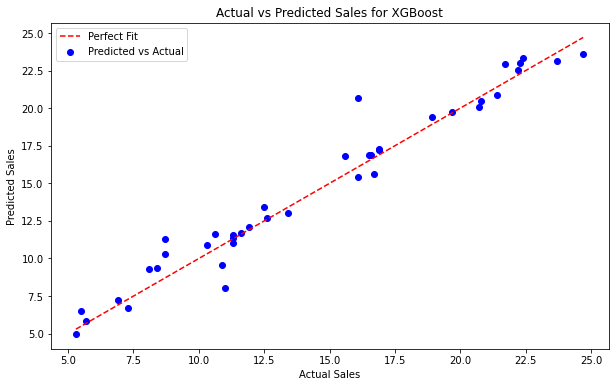

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred_best, color='blue', label='Predicted vs Actual')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'Actual vs Predicted Sales for {best_model_name}')
plt.legend()
plt.show()

results.to_csv("data/sales_predictions.csv", index=False)

In [173]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R^2 Scores:\n{cv_scores}\n")
print(f"Mean CV R^2 Score:\n{cv_scores.mean()}")

Cross-Validation R^2 Scores:
[0.92809266 0.96544739 0.92711249 0.93524713 0.92641211]

Mean CV R^2 Score:
0.936462355413932


Linear Regression is best suited to data with a simple linear relationships, while XGBoost and Random Forest are both tree based techniques that capture non-linear relationships, that's why they both perform better on the dataset. 